# Image filtering

This ipynb notebook contains code that is not complete! Carefully check during class and type the correct code whereever you see **```NNNNNNNNN```**

In [1]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import urllib

%matplotlib inline

We selected a professor's picture in https://www.researchgate.net/profile/Christian-Wallraven/12 because we thought you were watching me to see if we were good at our assignment.

In [3]:
prof = 'https://i1.rgstatic.net/ii/profile.image/735495483043841-1552367196294_Q512/Christian-Wallraven.jpg'
urllib.request.urlretrieve(prof,'christian_wallraven.jpg')

('christian_wallraven.jpg', <http.client.HTTPMessage at 0x7f4391c78e50>)

In [4]:
img = cv.imread('christian_wallraven.jpg')
# print some information about the image
print(img.shape)
print(type(img))

(512, 512, 3)
<class 'numpy.ndarray'>


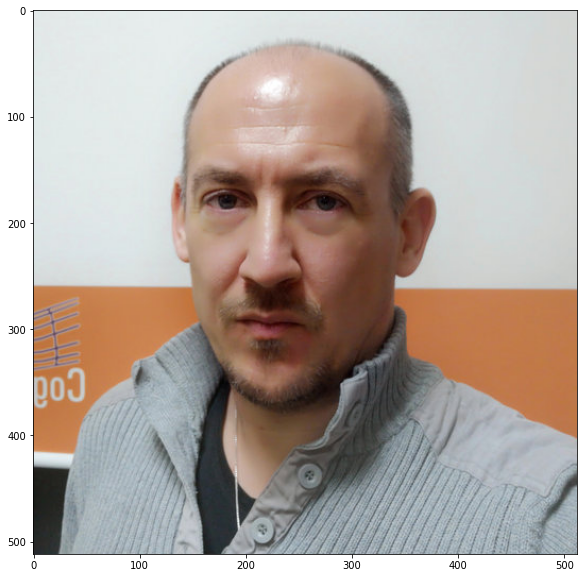

In [5]:
img_cvt = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img_cvt)

So, now we know that our image has a certain size and is stored as a ```numpy``` array of - in this case - three dimensions.

Now, let's next look at the image using OpenCV's built-in ```imshow``` function like so:

In [10]:
# let's make the image first a bit smaller
scale_percent = 50 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
rimg = cv.resize(img, dim, interpolation = cv.INTER_AREA)

# the first parameter for the imshow function simply gives
# the title string for the window and the second the actual
# image array as numpy data
cv.imshow('parasite',rimg)
# these two lines are necessary so that control is given back 
# to the browser and jupyter when we show the images 

# waits for a key indefinitely - blocking processing
cv.waitKey()
# once key has been pressed destroy all windows
cv.destroyAllWindows()

Let's use ```matplotlib``` to show the picture

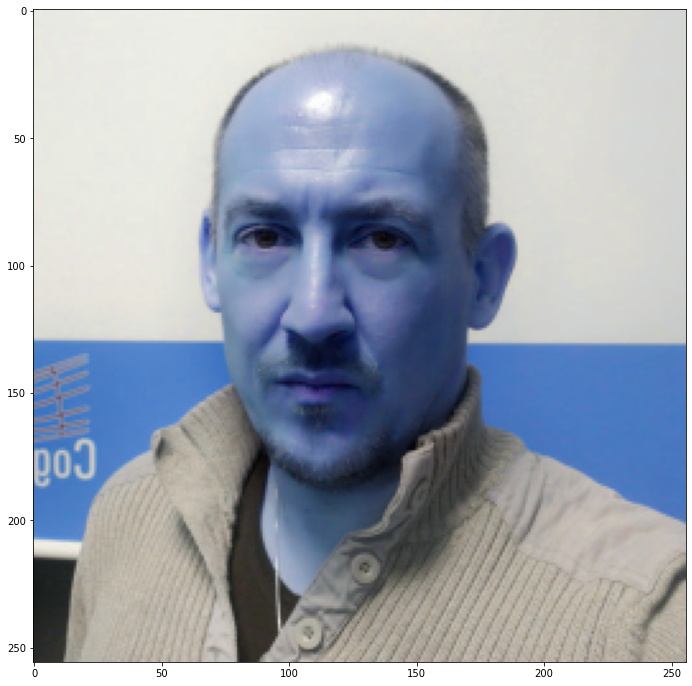

In [11]:
plt.figure(None, figsize=(12, 12))
plt.imshow(rimg)
plt.show()

Urgh. The colors are completely different. 

This is because OpenCV stores images in BGR (BLUE - GREEN - RED) format, rather than the usual RGB (RED - GREEN - BLUE) format from other languages. So, if we want to show the image properly with ```matplotlib``` we have to convert the image first.

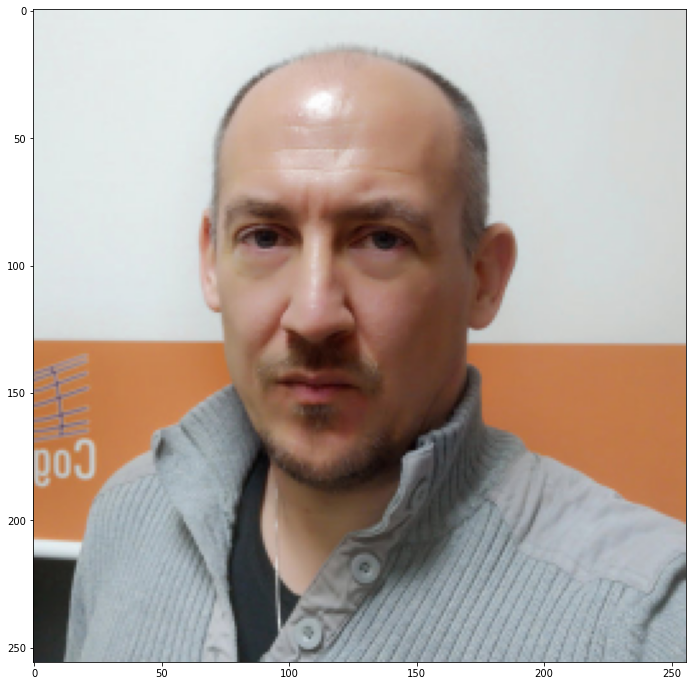

In [12]:
mrimg = cv.cvtColor(rimg, cv.COLOR_BGR2RGB)
plt.figure(None, figsize=(12, 12))
plt.imshow(mrimg)
plt.show()

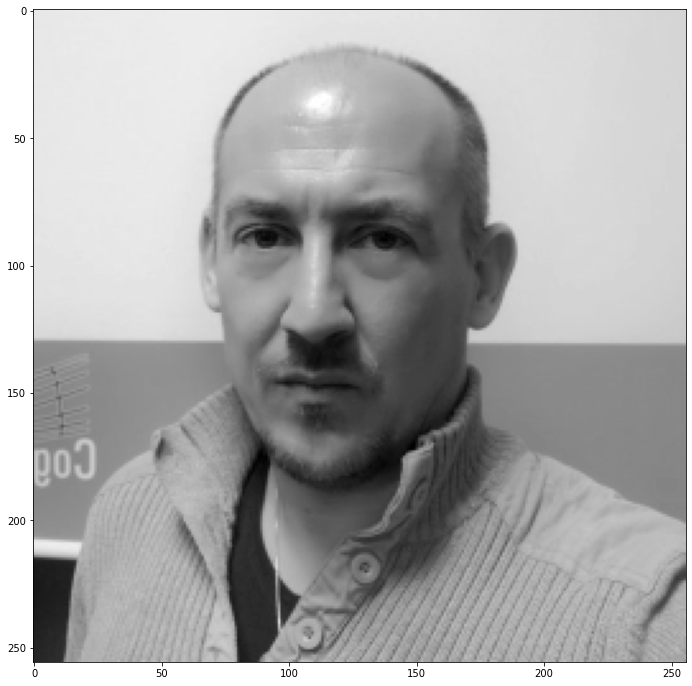

In [13]:
mrimg = cv.cvtColor(rimg, cv.COLOR_BGR2GRAY)
plt.figure(None, figsize=(12, 12))
plt.imshow(mrimg,cmap='gray')
plt.show()

Now, let's cut out a section of the image and let's display it as a grid of values. Most of the code below is to make sure that the plotting works fine and that we can add the pixel intensity values in a nice way to the plot. 

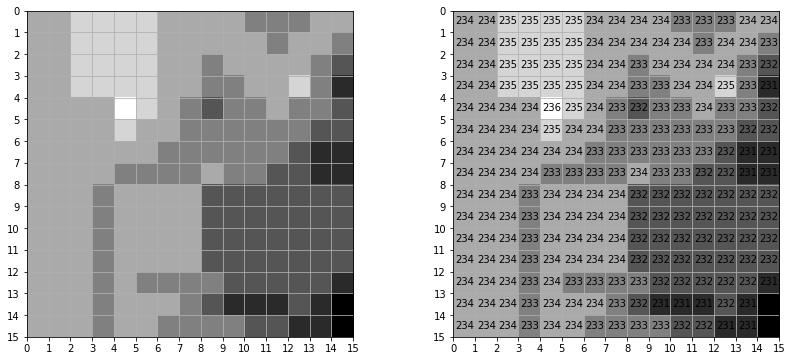

In [14]:
roi = mrimg[20:35,60:75]
# the extent variable is important for ensuring the right
# kind of plotting area!
extent = (0, roi.shape[1], roi.shape[0], 0)
plt.figure(None, figsize=(14, 6))
plt.subplot(1,2,1)
plt.imshow(roi,cmap='gray',extent=extent)
ax = plt.gca()
# this makes sure we have the correct grid lines
major_ticks = np.arange(0, 16, 1)
ax.set_xticks(major_ticks)
ax.set_yticks(major_ticks)
plt.grid(True)
plt.subplot(1,2,2)
plt.imshow(roi,cmap='gray',extent=extent)
ax = plt.gca()
major_ticks = np.arange(0, 16, 1)
ax.set_xticks(major_ticks)
ax.set_yticks(major_ticks)
# plots pixel intensity values with text color depending on 
# the pixel value
for i in range(0,15):
    for j in range(0,15):
        if roi[j,i]>127:
            plt.text(i+0.1,j+0.6,str(roi[j,i]),color='black')
        else:
            plt.text(i+0.1,j+0.6,str(roi[j,i]),color='white')
plt.grid(True)

Next, let's plot the image function F(x,y) as a surface.

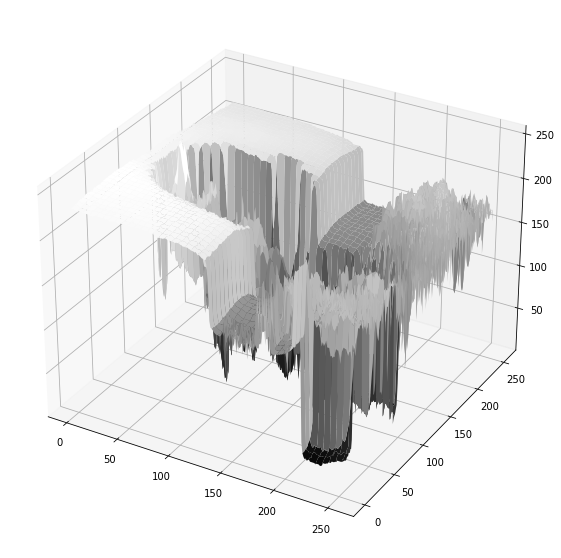

In [15]:
fig = plt.figure(None, figsize=(10, 10))
ax = fig.gca(projection='3d')
x = np.arange(0, mrimg.shape[1], 1)
y = np.arange(0, mrimg.shape[0], 1)
xx, yy = np.meshgrid(x, y)
ax.plot_surface(yy, xx, mrimg[yy, xx],cmap='gray')
plt.show()

Let's add something to our function

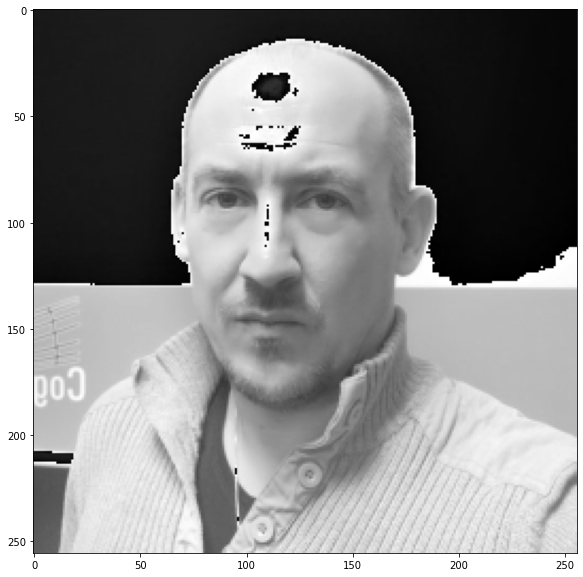

In [16]:
plt.figure(None, figsize=(10, 10))
plt.imshow(mrimg+50,cmap='gray') # 255가 넘어가면 다시 0에서 시작 그래서 배경이 어두워짐
plt.show()

That result cannot be correct - some parts of the image turn black, when actually the whole image should get brighter. This is because of clipping!

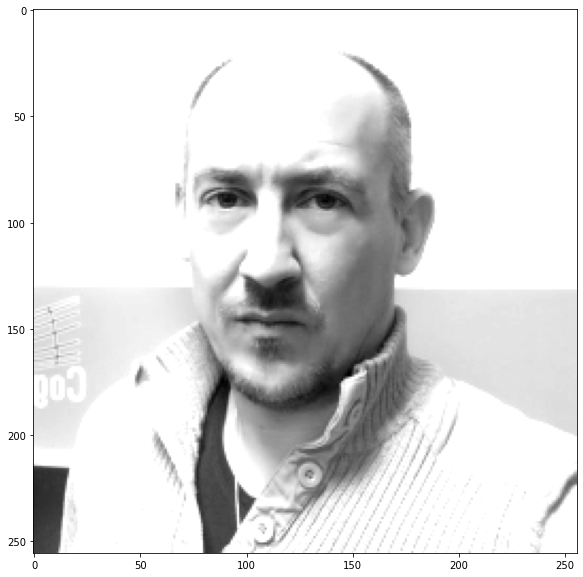

In [17]:
plt.figure(None, figsize=(10, 10))
plt.imshow(np.clip(mrimg.astype(float)+100,0,255),cmap='gray')
plt.show()

Here's the inverse of the image

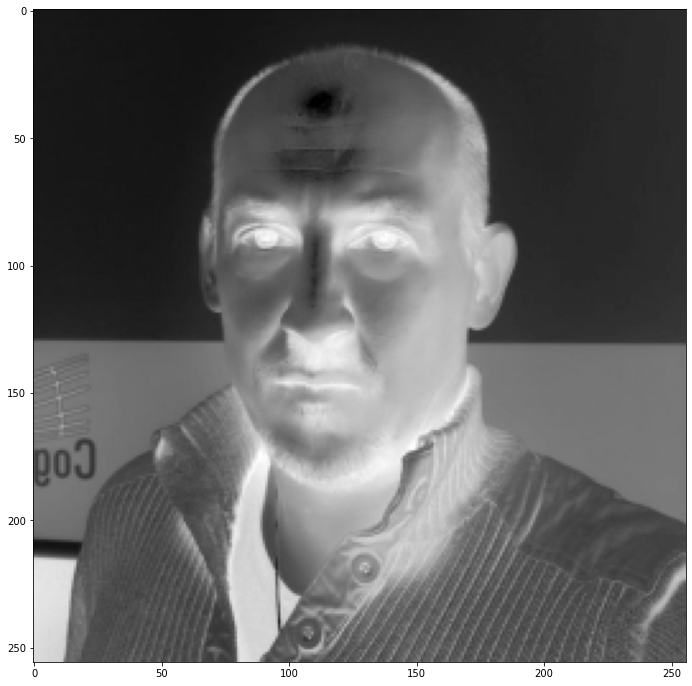

In [18]:
plt.figure(None, figsize=(12, 12))
plt.imshow(255-mrimg,cmap='gray')
plt.show()

# Filtering

Let's apply our simple retina-like filter to a signal

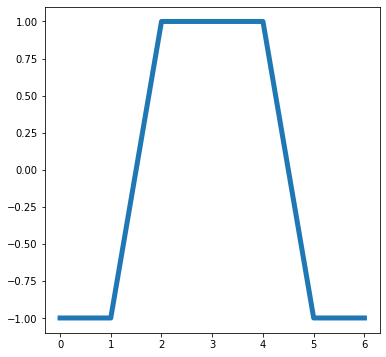

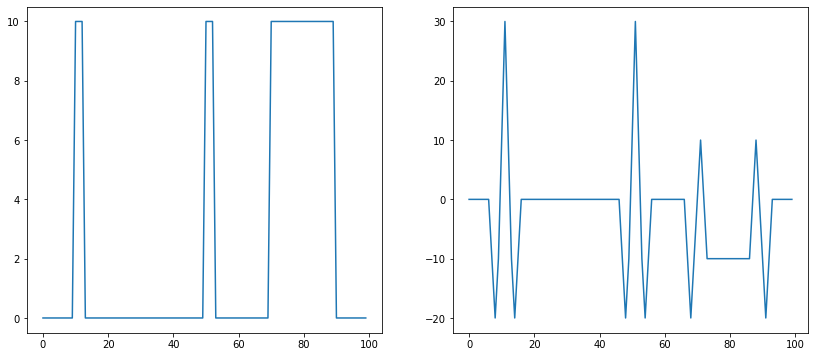

In [19]:
signal = np.zeros((100,1))
signal[10:13]=10;
signal[50:53]=10;
signal[70:90]=10;

filtered_signal = np.zeros_like(signal)
weights = np.array((-1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0))
plt.figure(None, figsize=(6, 6))
plt.plot(weights,linewidth=5)
for i in range(3,len(signal)-3):
    filtered_signal[i]=np.dot(weights, signal[i-3:i+4])
    
plt.figure(None, figsize=(14, 6))
plt.subplot(1,2,1)
plt.plot(signal)
plt.subplot(1,2,2)
plt.plot(filtered_signal)
plt.show()

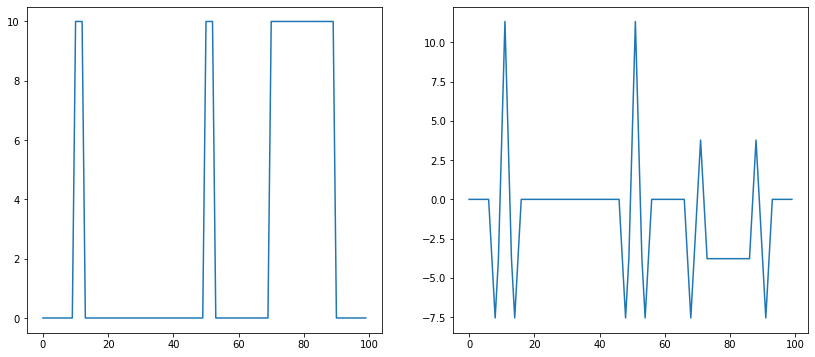

In [20]:
weights = np.array((-1,-1,1,1,1,-1,-1))
weights = weights/np.linalg.norm(weights, ord=2, keepdims=True)
for i in range(3,len(signal)-3):
    filtered_signal[i]=np.dot(weights, signal[i-3:i+4])
    
plt.figure(None, figsize=(14, 6))
plt.subplot(1,2,1)
plt.plot(signal)
plt.subplot(1,2,2)
plt.plot(filtered_signal)
plt.show()

## Scanline
Let's see what the image function says for our picture at one scanline.

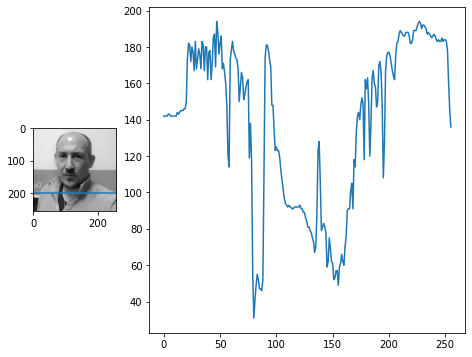

In [21]:
cuty = 200
plt.figure(None, figsize=(14, 6))
grid = plt.GridSpec(1, 7, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.imshow(mrimg,cmap='gray')
plt.plot((0,mrimg.shape[1]-1),(cuty,cuty))
plt.subplot(grid[0, 1:4])
oneline = mrimg[cuty,:]
plt.plot(oneline)
plt.show()

## Filtering one image line
Let's apply our filter to the scanline in the image.

In [22]:
newoneline = np.zeros_like(oneline)
weights = (-1,-1,1,1,1,-1,-1)
for i in range(3,len(oneline)-3):
    newoneline[i]=np.dot(weights,oneline[i-3:i+4])

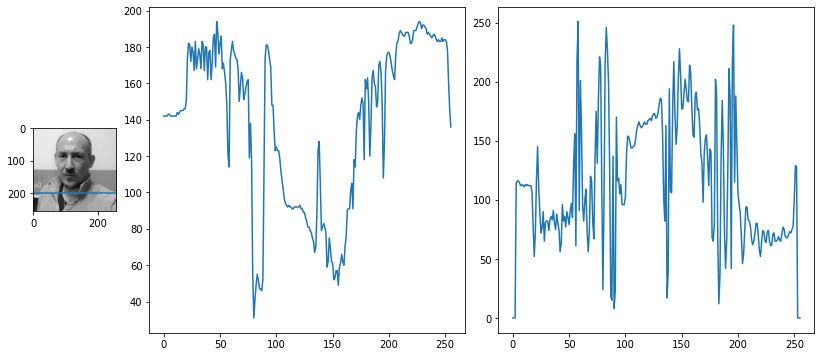

In [23]:
plt.figure(None, figsize=(14, 6))
grid = plt.GridSpec(1, 7, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.imshow(mrimg,cmap='gray')
plt.plot((0,mrimg.shape[1]-1),(cuty,cuty))
plt.subplot(grid[0, 1:4])
plt.plot(oneline)
plt.subplot(grid[0, 4:])
plt.plot(newoneline)
plt.show()

## Filtering in 2D
Let's take the simple averaging filter and run it across the image.

In [24]:
weights2d = [
    (1,1,1),
    (1,1,1),
    (1,1,1)
]
weights2d = np.array(weights2d)
weights2d = 1/np.sum(weights2d)*weights2d

In [25]:
filteredmrimg = np.zeros_like(mrimg)
for i in range(1,mrimg.shape[1]-1):
    for j in range(1,mrimg.shape[0]-1):
        filteredmrimg[j,i]=np.sum(weights2d*mrimg[j-1:j+2,i-1:i+2])

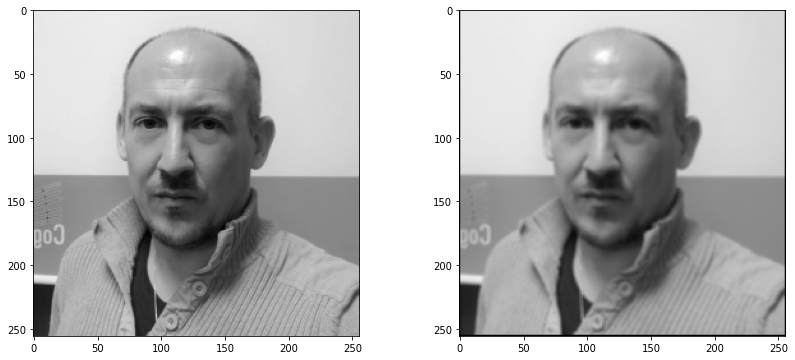

In [26]:
plt.figure(None, figsize=(14, 6))
plt.subplot(1,2,1)
plt.imshow(mrimg,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(filteredmrimg,cmap='gray')
plt.show()

In [27]:
# this function will filter an roi using a set of weights
def filter_and_plot(weights,roi):
    # these two lines are important as they ensure correct
    # computations!
    weights = weights.astype(float)
    roi = roi.astype(float)
    # this holds the end result
    filtered = np.zeros_like(roi)
    width = int((weights.shape[1]-1)/2)
    height = int((weights.shape[0]-1)/2)
    # do the filtering
    for i in range(height,roi.shape[1]-height):
        for j in range(width,roi.shape[0]-width):
            filtered[j,i]=np.sum(weights*roi[j-width:j+width+1,i-height:i+height+1])
    # plot the original, the filter, and the filtered image
    plt.figure(None, figsize=(14, 6))
    grid = plt.GridSpec(1, 7, wspace=0.4, hspace=0.3)
    plt.subplot(grid[0, 0:3])
    plt.imshow(roi,cmap='gray')
    plt.subplot(grid[0, 3])
    extent = (0, weights.shape[1], weights.shape[0], 0)
    plt.imshow(weights,cmap='gray',extent=extent)
    plt.axis('off')
    if width<5:
        for i in range(0,len(weights)):
            for j in range(0,len(weights)):
                if weights[i,j]>np.mean(weights): # replace np.max(weights) with np.mean(weights)
                    plt.text(j+0.1,i+0.6,'{0:.2f}'.format(weights[i,j]),color='black')
                else:
                    plt.text(j+0.1,i+0.6,'{0:.2f}'.format(weights[i,j]),color='white')
    plt.grid(True)
    plt.subplot(grid[0, 4:])
    plt.imshow(filtered,cmap='gray')
    plt.show()
    return(filtered)

In [28]:
faceroi = mrimg[10:190,30:210]

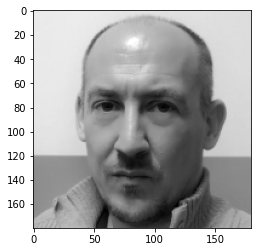

In [29]:
plt.imshow(faceroi, cmap='gray')

## Different filters
Let's try out a few simple filters.

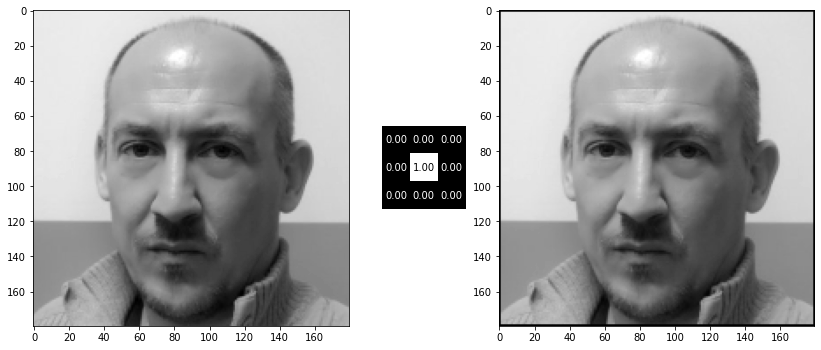

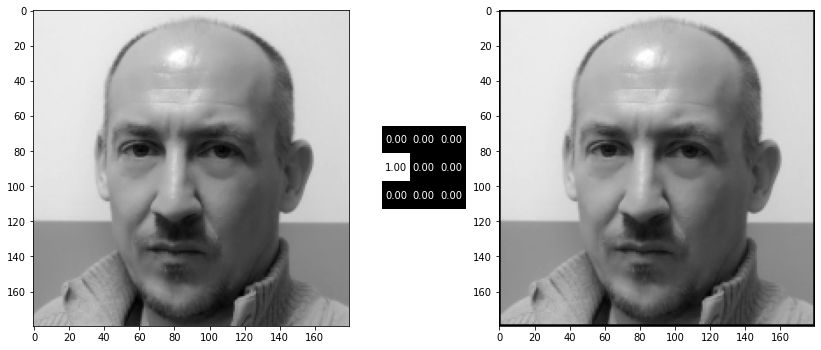

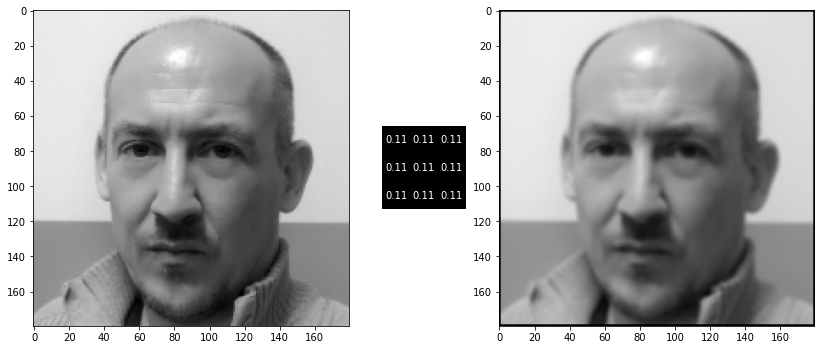

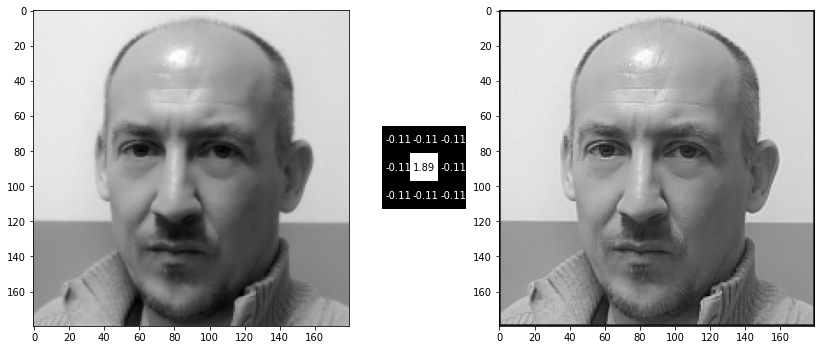

In [35]:
filter_id = np.array([
    (0,0,0),
    (0,1,0),
    (0,0,0)
])
filter_id = 1/np.sum(filter_id)*filter_id

filter_and_plot(filter_id,faceroi)

filter_left = np.array([
    (0,0,0),
    (1,0,0),
    (0,0,0)
])
filter_left = 1/np.sum(filter_left)*filter_left


filter_and_plot(filter_left,faceroi)

filter_blur = np.array([
    (1,1,1),
    (1,1,1),
    (1,1,1)
])
filter_blur = 1/np.sum(filter_blur)*filter_blur


filter_and_plot(filter_blur,faceroi)


filter_contrast = 2*filter_id - filter_blur
filter_contrast = 1/np.sum(filter_contrast)*filter_contrast


fc = filter_and_plot(filter_contrast,faceroi)

## Larger blur
Let's use a bigger averaging filter and see its effects.

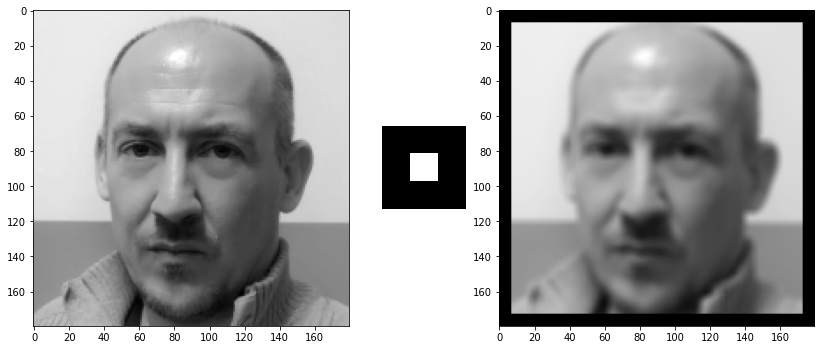

In [36]:
filter_blur_big = np.zeros((15,15))
filter_blur_big[5:10,5:10]=1
filter_blur_big = 1/np.sum(filter_blur_big)*filter_blur_big
f=filter_and_plot(filter_blur_big,faceroi)

## High-pass
Here's the difference between the blurred and the original iamge. Per definition it contains the high frequencies.

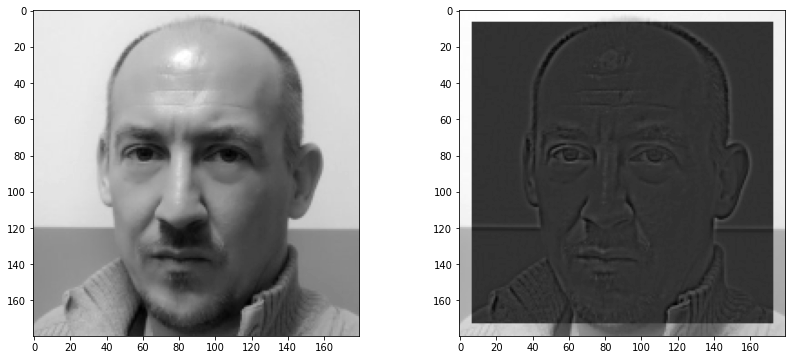

In [37]:
plt.figure(None, figsize=(14, 6))
plt.subplot(1,2,1)
plt.imshow(faceroi,cmap='gray')
plt.subplot(1,2,2)
diffimg = faceroi-f.astype(float)
plt.imshow(diffimg,cmap='gray')
plt.show()

## Gradual sharpening
Let's add more and more of the difference image to the blurred image

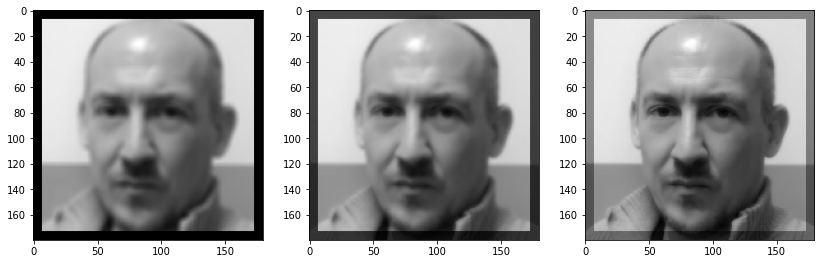

In [38]:
plt.figure(None, figsize=(14, 6))
plt.subplot(1,3,1)
plt.imshow(f,cmap='gray')
plt.subplot(1,3,2)
f = f.astype(float)
plt.imshow(f+0.3*diffimg,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(f+0.6*diffimg,cmap='gray')
plt.show()

## Derivatives
Now, let's derive our image function using the simple derivative approximation.

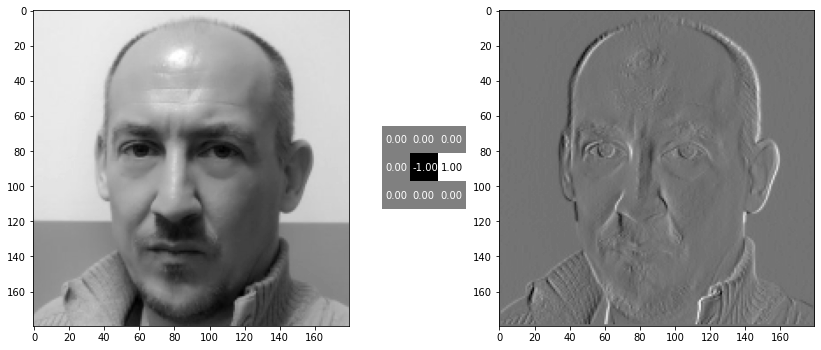

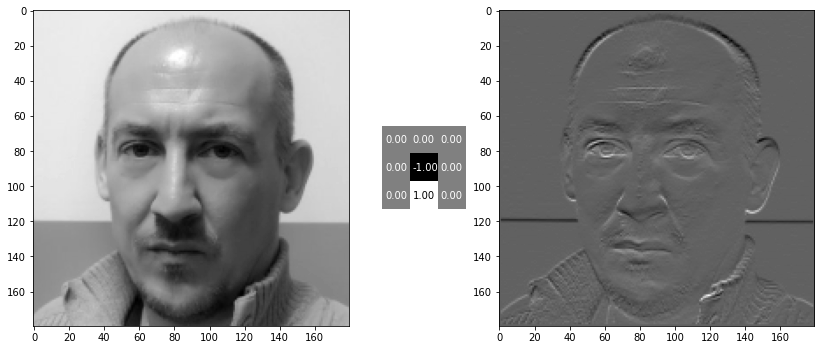

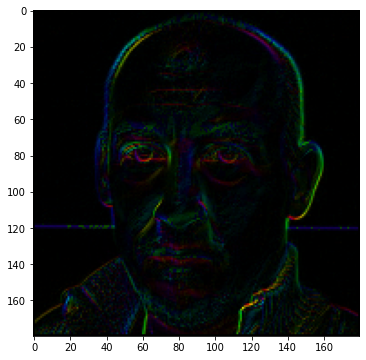

In [33]:
filter_dx = np.array([
    (0,0,0),
    (0,-1,1),
    (0,0,0)
])
fdx=filter_and_plot(filter_dx,faceroi)

filter_dy = np.array([
    (0,0,0),
    (0,-1,0),
    (0,1,0)
])
fdy=filter_and_plot(filter_dy,faceroi)

plt.figure(None, figsize=(6, 6))
hsv = np.zeros((fdx.shape[1],fdx.shape[0],3))
hsv[...,1] = 255
ang = np.arctan2(fdx,fdy)
hsv[...,0] = ang*180/np.pi
mag = np.sqrt(fdx*fdx+fdy*fdy)
hsv[...,2] = (mag-np.min(mag))/(np.max(mag)-np.min(mag))*255
plt.imshow(cv.cvtColor(np.uint8(hsv),cv.COLOR_HSV2RGB_FULL))
plt.show()

## Sobel filter
Let's implement the simple Gaussian derivative filter approximation - the Sobel filters.

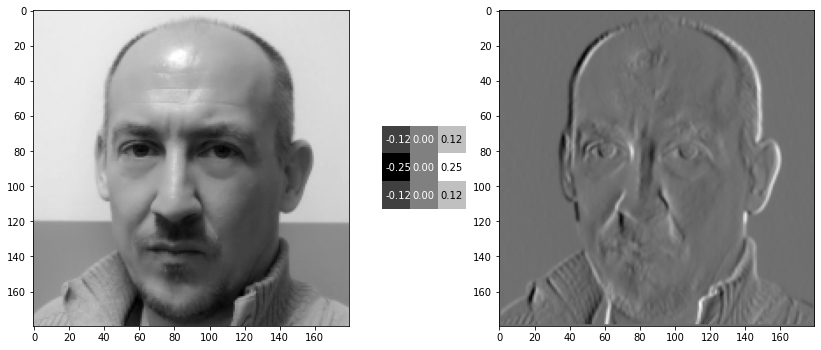

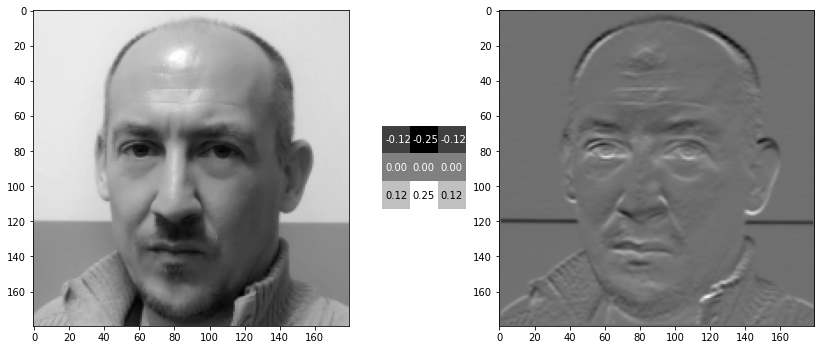

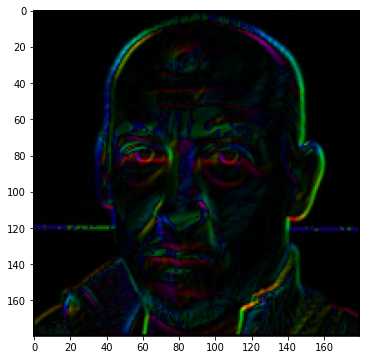

In [32]:
filter_sobelx = np.array([
    (-1,0,1),
    (-2,0,2),
    (-1,0,1)
])
fsx=filter_and_plot(1/8*filter_sobelx,faceroi)

filter_sobely = np.array([
    (-1,-2,-1),
    (0,0,0),
    (1,2,1)
])
fsy=filter_and_plot(1/8*filter_sobely,faceroi)

plt.figure(None, figsize=(6, 6))
hsv = np.zeros((fsx.shape[1],fsx.shape[0],3))
hsv[...,1] = 255
ang = np.arctan2(fsx,fsy)
hsv[...,0] = ang*180/np.pi
mag = np.sqrt(fsx*fsx+fsy*fsy)
hsv[...,2] = (mag-np.min(mag))/(np.max(mag)-np.min(mag))*255
plt.imshow(cv.cvtColor(np.uint8(hsv),cv.COLOR_HSV2RGB_FULL))
plt.show()

# Assignment2

In [39]:
import time
from tqdm.notebook import tqdm
import datetime
import pandas as pd
import seaborn as sns

In [40]:
img = cv.imread('christian_wallraven.jpg')
# resize image
rimg = cv.resize(img, (500,500), interpolation = cv.INTER_AREA)
# convert BGR to gray scale
mrimg = cv.cvtColor(rimg, cv.COLOR_BGR2GRAY)

In [41]:
# this function will filter an roi using a set of weights
def filter(weights,roi):
    # these two lines are important as they ensure correct
    # computations!
    weights = weights.astype(float)
    roi = roi.astype(float)
    # this holds the end result
    filtered = np.zeros_like(roi)
    width = int((weights.shape[1]-1)/2)
    height = int((weights.shape[0]-1)/2)
    # do the filtering
    for i in range(height,roi.shape[1]-height):
        for j in range(width,roi.shape[0]-width):
            filtered[j,i]=np.sum(weights*roi[j-width:j+width+1,i-height:i+height+1])

In [49]:
# filter size list
n_lst = [3,5,9,15,23]
# define dictionary of computation time by filter size 
time_dict = dict([(f'size{n}',{}) for n in n_lst])
cv_time_dict = dict([(f'size{n}',{}) for n in n_lst])
for n in tqdm(n_lst, desc='filter size'):
    # define time lst
    time_lst = []
    cv_time_lst = []
    
    # define blur filter
    blur_filter = np.ones((n,n))
    
    # filtering image
    for t in tqdm(range(20), leave=False, desc='steps'):
        
        # run filter functions
        start = time.time()
        filter(weights=blur_filter, roi=mrimg)
        end = time.time() - start 
        time_lst.append(end)
        
        # run opencv
        start = time.time()
        cv.filter2D(src=mrimg, ddepth=-1, kernel=blur_filter)
        end = time.time() - start 
        cv_time_lst.append(end)
    
    # time 
    time_dict[f'size{n}']['mean'] = str(datetime.timedelta(seconds=np.mean(time_lst)))  
    time_dict[f'size{n}']['std'] = str(datetime.timedelta(seconds=np.std(time_lst)))  
    cv_time_dict[f'size{n}']['mean'] = str(datetime.timedelta(seconds=np.mean(cv_time_lst)))        
    cv_time_dict[f'size{n}']['std'] = str(datetime.timedelta(seconds=np.std(cv_time_lst)))  

In [51]:
time_df = pd.DataFrame({'filter_func (mean)':[time_dict[f'size{n}']['mean'] for n in n_lst],
                        'filter_func (std)':[time_dict[f'size{n}']['std'] for n in n_lst],
                        'opencv (mean)':[cv_time_dict[f'size{n}']['mean'] for n in n_lst],
                        'opencv (std)':[cv_time_dict[f'size{n}']['std'] for n in n_lst]},
                        index=list(time_dict.keys()))
time_df

filter_func (mean) filter_func (std)   opencv (mean)    opencv (std)
size3      0:00:02.006593    0:00:00.065378  0:00:00.000227  0:00:00.000044
size5      0:00:01.966926    0:00:00.043482  0:00:00.000509  0:00:00.000106
size9      0:00:01.972027    0:00:00.047833  0:00:00.001441  0:00:00.000050
size15     0:00:02.054571    0:00:00.053821  0:00:00.003206  0:00:00.000458
size23     0:00:02.176916    0:00:00.069011  0:00:00.003177  0:00:00.000519

## Discussion

The results can be interpreted from two perspectives. The first is a comparison of time changes as filter size changes in my filter function. The second is the comparison of computation time between the two functions.

First of all, There is no big difference when the filter size is 3,5,9, but it took longer from 15 in my filter function. I think the amount of time spent on the filter increases linearly. The correlation between the filter size and the total operation is closed to one for a 500 x 500 pixels gray-scale image (figure 1). The reason is that the number of the filter weights increases with $n^2$ (eq. 1), but the number of operations between the image and the filter decreases (eq. 2) as follows. 

$$the\ number\ of\ filter\ weights  = n^2 \tag{eq. 1}$$ 
$$the\ number\ of\ operation = (w - n + 1) \times (h - n + 1) \tag{eq. 2}$$

where `h` is a image height and `w` is a image weight. `n` is a filter size.

<div align='center'>
    <img src='./corr_op_f.jpg'>
    Figure 1. the correlation between the filter size and the number of total operation
</div>

As a result, the compututation time is affected by other factors

Second is that opencv `filter2D` is much faster than my filter functions. The reason is that opencv code is based on C++. Comparing Python vs C++ speed reveals which executes faster and creates more time-efficient programs. One thing to note that C++ compiles the code and Python interprets the code. The interpretation of code is always slower than the compilation. 

In shortly, I believe that using opencv is more beneficial both in time and effectively for the reasons I have mentioned above




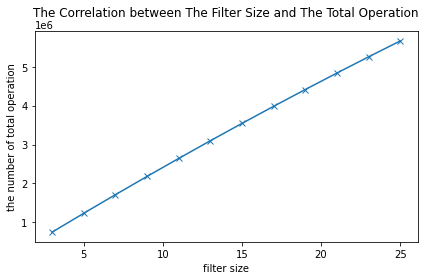

In [45]:
# define initial values
image_size = (500, 500)
filter_size = range(3,26,2)
nb_operation = [(image_size[0]-n+1)*(image_size[1]-n+1) for n in filter_size]
total_operation = [filter_size[i]*nb_operation[i] for i in range(len(filter_size))]
# show plot
plt.plot(filter_size, total_operation, marker='x')
plt.xlabel('filter size')
plt.ylabel('the number of total operation')
plt.title('The Correlation between The Filter Size and The Total Operation', pad=15)
plt.tight_layout()
plt.savefig('./corr_op_f.jpg')